In [1]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

In [2]:
file_path = "./Resources/GlobalLandTemperaturesByState.csv"
global_temp_df = pd.read_csv(file_path)
global_temp_df.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,State,Country
0,1855-05-01,25.544,1.171,Acre,Brazil
1,1855-06-01,24.228,1.103,Acre,Brazil
2,1855-07-01,24.371,1.044,Acre,Brazil
3,1855-08-01,25.427,1.073,Acre,Brazil
4,1855-09-01,25.675,1.014,Acre,Brazil


In [3]:
# cast to to datetime
dt= lambda df_: pd.to_datetime(df_['dt'])

In [4]:
# Extract average Temp across United States since the begining of the 19th Century
global_temp_df = global_temp_df.loc[(global_temp_df['dt'] >= '1930-01-01')]
global_temp_df


,dt,AverageTemperature,AverageTemperatureUncertainty,State,Country
896,1930-01-01,25.583,0.544,Acre,Brazil
897,1930-02-01,25.887,0.725,Acre,Brazil
898,1930-03-01,25.871,0.775,Acre,Brazil
899,1930-04-01,25.414,0.367,Acre,Brazil
900,1930-05-01,25.066,0.467,Acre,Brazil
...,...,...,...,...,...
645670,2013-05-01,21.634,0.578,Zhejiang,China
645671,2013-06-01,24.679,0.596,Zhejiang,China
645672,2013-07-01,29.272,1.340,Zhejiang,China
645673,2013-08-01,29.202,0.869,Zhejiang,China


In [5]:
# drop the null values
cleanglobal_temp_df = global_temp_df.dropna()
cleanglobal_temp_df.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,State,Country
896,1930-01-01,25.583,0.544,Acre,Brazil
897,1930-02-01,25.887,0.725,Acre,Brazil
898,1930-03-01,25.871,0.775,Acre,Brazil
899,1930-04-01,25.414,0.367,Acre,Brazil
900,1930-05-01,25.066,0.467,Acre,Brazil


In [6]:
# Make a copy of the data for future graphs
copy = cleanglobal_temp_df.copy()
# check the unique coloumn
cleanglobal_temp_df.nunique()


dt                                1005
AverageTemperature               71290
AverageTemperatureUncertainty     1951
State                              241
Country                              7
dtype: int64

In [7]:
cleanglobal_temp_df.dtypes

dt                                object
AverageTemperature               float64
AverageTemperatureUncertainty    float64
State                             object
Country                           object
dtype: object

In [8]:
cleanglobal_temp_df.notnull().sum()


dt                               242024
AverageTemperature               242024
AverageTemperatureUncertainty    242024
State                            242024
Country                          242024
dtype: int64

In [9]:
# Recode the Columns
cleanglobal_temp_df = cleanglobal_temp_df.rename(columns={"dt":"Date",
                                                  "AverageTemperature":"Avg_temp",
                                                  "AverageTemperatureUncertainty":"Avg_temp_Uncer",
                                                  "State":"State",
                                                  "Country":"Country"})
cleanglobal_temp_df


,Date,Avg_temp,Avg_temp_Uncer,State,Country
896,1930-01-01,25.583,0.544,Acre,Brazil
897,1930-02-01,25.887,0.725,Acre,Brazil
898,1930-03-01,25.871,0.775,Acre,Brazil
899,1930-04-01,25.414,0.367,Acre,Brazil
900,1930-05-01,25.066,0.467,Acre,Brazil
...,...,...,...,...,...
645669,2013-04-01,15.710,0.461,Zhejiang,China
645670,2013-05-01,21.634,0.578,Zhejiang,China
645671,2013-06-01,24.679,0.596,Zhejiang,China
645672,2013-07-01,29.272,1.340,Zhejiang,China


In [10]:
# Format the columns.
cleanglobal_temp_df["Avg_temp"] = cleanglobal_temp_df["Avg_temp"].map("{:.2f}".format)
cleanglobal_temp_df["Avg_temp_Uncer"] = cleanglobal_temp_df["Avg_temp_Uncer"].map("{:.2f}".format)
cleanglobal_temp_df

,Date,Avg_temp,Avg_temp_Uncer,State,Country
896,1930-01-01,25.58,0.54,Acre,Brazil
897,1930-02-01,25.89,0.72,Acre,Brazil
898,1930-03-01,25.87,0.78,Acre,Brazil
899,1930-04-01,25.41,0.37,Acre,Brazil
900,1930-05-01,25.07,0.47,Acre,Brazil
...,...,...,...,...,...
645669,2013-04-01,15.71,0.46,Zhejiang,China
645670,2013-05-01,21.63,0.58,Zhejiang,China
645671,2013-06-01,24.68,0.60,Zhejiang,China
645672,2013-07-01,29.27,1.34,Zhejiang,China


In [11]:
# Save in the Resources
cleanglobal_temp_df.to_csv(index=True)
filepath = Path('Resources/cleanglobal_temp.csv')  
filepath.parent.mkdir(parents=True, exist_ok=True)  
cleanglobal_temp_df.to_csv(filepath)


In [12]:

copy['Date'] = pd.to_datetime(copy.dt)
copy['Year'] = copy['Date'].dt.year
Global_temp =copy.reset_index()

In [13]:
Global_temp

,index,dt,AverageTemperature,AverageTemperatureUncertainty,State,Country,Date,Year
0,896,1930-01-01,25.583,0.544,Acre,Brazil,1930-01-01,1930
1,897,1930-02-01,25.887,0.725,Acre,Brazil,1930-02-01,1930
2,898,1930-03-01,25.871,0.775,Acre,Brazil,1930-03-01,1930
3,899,1930-04-01,25.414,0.367,Acre,Brazil,1930-04-01,1930
4,900,1930-05-01,25.066,0.467,Acre,Brazil,1930-05-01,1930
...,...,...,...,...,...,...,...,...
242019,645669,2013-04-01,15.710,0.461,Zhejiang,China,2013-04-01,2013
242020,645670,2013-05-01,21.634,0.578,Zhejiang,China,2013-05-01,2013
242021,645671,2013-06-01,24.679,0.596,Zhejiang,China,2013-06-01,2013
242022,645672,2013-07-01,29.272,1.340,Zhejiang,China,2013-07-01,2013


In [14]:
Global_temp.drop(columns = ['dt'], axis = 1, inplace = True)
Global_temp

,index,AverageTemperature,AverageTemperatureUncertainty,State,Country,Date,Year
0,896,25.583,0.544,Acre,Brazil,1930-01-01,1930
1,897,25.887,0.725,Acre,Brazil,1930-02-01,1930
2,898,25.871,0.775,Acre,Brazil,1930-03-01,1930
3,899,25.414,0.367,Acre,Brazil,1930-04-01,1930
4,900,25.066,0.467,Acre,Brazil,1930-05-01,1930
...,...,...,...,...,...,...,...
242019,645669,15.710,0.461,Zhejiang,China,2013-04-01,2013
242020,645670,21.634,0.578,Zhejiang,China,2013-05-01,2013
242021,645671,24.679,0.596,Zhejiang,China,2013-06-01,2013
242022,645672,29.272,1.340,Zhejiang,China,2013-07-01,2013


In [15]:
Global_temp.drop(columns = ['index'], axis = 1, inplace = True)
Global_temp

,AverageTemperature,AverageTemperatureUncertainty,State,Country,Date,Year
0,25.583,0.544,Acre,Brazil,1930-01-01,1930
1,25.887,0.725,Acre,Brazil,1930-02-01,1930
2,25.871,0.775,Acre,Brazil,1930-03-01,1930
3,25.414,0.367,Acre,Brazil,1930-04-01,1930
4,25.066,0.467,Acre,Brazil,1930-05-01,1930
...,...,...,...,...,...,...
242019,15.710,0.461,Zhejiang,China,2013-04-01,2013
242020,21.634,0.578,Zhejiang,China,2013-05-01,2013
242021,24.679,0.596,Zhejiang,China,2013-06-01,2013
242022,29.272,1.340,Zhejiang,China,2013-07-01,2013


In [16]:
Global_temp.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
AverageTemperature,242024.0,9.931450,13.895670,-44.715,0.589,12.355,21.070,36.339
AverageTemperatureUncertainty,242024.0,0.337751,0.199176,0.036,0.219,0.291,0.396,5.992
Year,242024.0,1971.344991,24.159017,1930.000,1950.000,1971.000,1992.000,2013.000


In [17]:
world_temp_byCountry = Global_temp.groupby(by='Country')[['AverageTemperature',
                                             'AverageTemperatureUncertainty']].agg(lambda x: x.astype(float).mean())


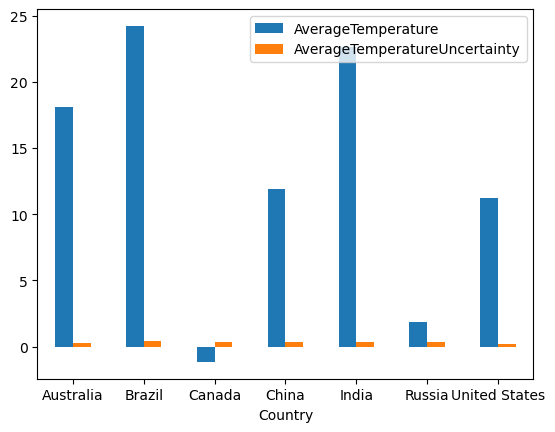

In [18]:
# Create the bar plot.
ax =world_temp_byCountry.plot.bar (rot=0)

In [20]:
world_temp_by_year = Global_temp.groupby(by='Year')[['AverageTemperature',
                                             'AverageTemperatureUncertainty']].agg(lambda x: x.astype(float).mean())
world_temp_by_year

,AverageTemperature,AverageTemperatureUncertainty
Year,,
1930,9.614909,0.484690
1931,9.623169,0.490909
1932,9.845539,0.500241
1933,9.126992,0.474590
1934,9.836130,0.468374
...,...,...
2009,10.461537,0.290795
2010,10.686661,0.295223
2011,10.500732,0.302583


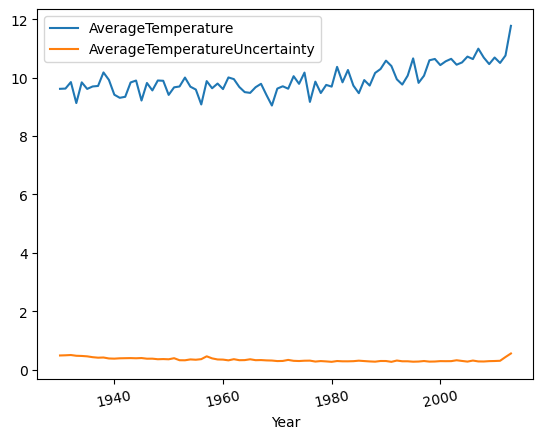

In [24]:
# Create the bar plot.
ax =world_temp_by_year.plot.line (rot=12)